In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from sklearn.metrics import log_loss, roc_auc_score, recall_score, precision_score, average_precision_score, f1_score, classification_report, accuracy_score, ConfusionMatrixDisplay, confusion_matrix,  roc_curve, precision_recall_curve

In [21]:
import config as conf
import data_preparation as pr
import features_extract as ex

In [22]:
# DATA PREPARATION
train_events = conf.TRAIN_EVENTS
train_submissions = conf.TRAIN_SUBMISSIONS
test_events = conf.TEST_EVENTS
test_submissions = conf.TEST_SUBMISSIONS

In [23]:
train_data =pr.data_preparation(train_events, train_submissions)
test_data = pr.data_preparation(test_events, test_submissions)

In [24]:
# X_second = pd.read_csv('/Users/mitya/X_cv.csv')

In [25]:
# FEATURES EXTRACTION
X, y = ex.features_extract(train_data)
X_res, _ = ex.features_extract(test_data)

In [27]:
rs = np.random.seed(0)

In [28]:
y = y.map({True: 1, False: 0})

In [29]:
# MODEL VALIDATION
n_features = X.shape[1]
model = Sequential()
model.add(Dense(int(round((n_features+1)/2)), input_shape=(n_features,), activation='relu'))
model.add(Dense(int(round((n_features+1)/4)), activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [30]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [62]:
ann = model.fit(X, y, epochs=5, batch_size=10)

Epoch 1/5
1924/1924 [==============================] - 3s 1ms/step - loss: 0.2298 - accuracy: 0.9056
Epoch 2/5
1924/1924 [==============================] - 3s 1ms/step - loss: 0.2279 - accuracy: 0.9062
Epoch 3/5
1924/1924 [==============================] - 3s 1ms/step - loss: 0.2266 - accuracy: 0.9054
Epoch 4/5
1924/1924 [==============================] - 2s 1ms/step - loss: 0.2253 - accuracy: 0.9063
Epoch 5/5
1924/1924 [==============================] - 2s 1ms/step - loss: 0.2243 - accuracy: 0.9056


In [32]:
predictions_proba = model.predict(X)

602/602 [==============================] - 1s 820us/step


In [33]:
predictions = (model.predict(X) > 0.5).astype(int)

602/602 [==============================] - 1s 829us/step


In [36]:
print('Log loss = {:.5f}'.format(log_loss(y, predictions_proba)))
print('AUC = {:.5f}'.format(roc_auc_score(y, predictions_proba)))
print('Average Precision = {:.5f}'.format(average_precision_score(y, predictions_proba)))
print('\nUsing 0.5 as threshold:')
print('Accuracy = {:.5f}'.format(accuracy_score(y, predictions)))
print('Precision = {:.5f}'.format(precision_score(y, predictions)))
print('Recall = {:.5f}'.format(recall_score(y, predictions)))
print('F1 score = {:.5f}'.format(f1_score(y, predictions)))

print('\nClassification Report')
print(classification_report(y, predictions))

Log loss = 0.22995
AUC = 0.87892
Average Precision = 0.47650

Using 0.5 as threshold:
Accuracy = 0.90616
Precision = 0.62256
Recall = 0.21037
F1 score = 0.31447

Classification Report
              precision    recall  f1-score   support

           0       0.92      0.99      0.95     17266
           1       0.62      0.21      0.31      1968

    accuracy                           0.91     19234
   macro avg       0.77      0.60      0.63     19234
weighted avg       0.89      0.91      0.88     19234



In [65]:
fpr, tpr, _ = roc_curve(y, predictions_proba)

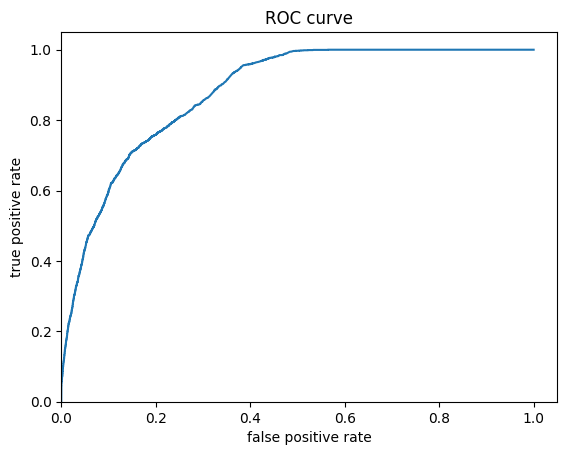

In [66]:
plt.plot(fpr, tpr)
plt.title('ROC curve')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.xlim(0,)
plt.ylim(0,)
plt.show()

In [67]:
pr, rc, _ = precision_recall_curve(y, predictions_proba)

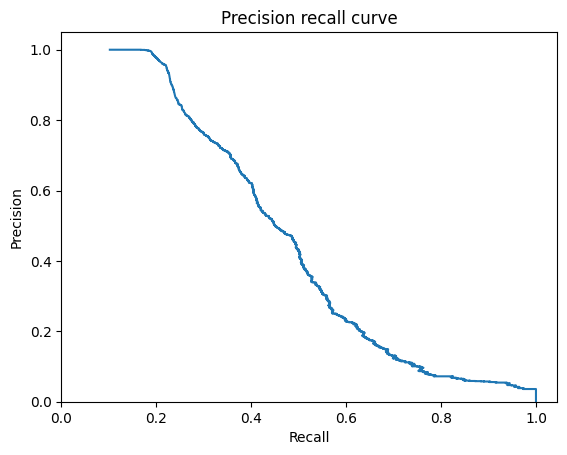

In [68]:
plt.plot(pr, rc)
plt.title('Precision recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.xlim(0,)
plt.ylim(0,)
plt.show()

Confusion Matrix


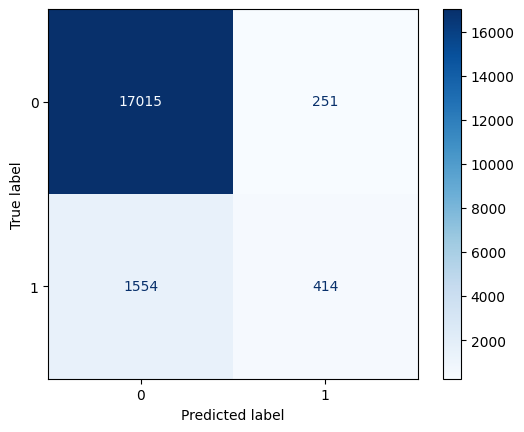

In [61]:
print('Confusion Matrix')
conf_matrix = confusion_matrix(y, predictions)
disp = ConfusionMatrixDisplay(conf_matrix)
disp.plot(cmap=plt.cm.Blues, values_format='g')
plt.show()

In [37]:
# PREDICTION
predictions_proba_res = model.predict(X_res)

194/194 [==============================] - 0s 849us/step


In [55]:
# EXPORT DATA
result = pd.concat([pd.Series(test_data.index), pd.DataFrame(predictions_proba_res)], axis=1).rename(columns={0: 'is_gone'}).set_index('user_id')

In [57]:
result.to_csv('/Users/mitya/prediction_res_tf.csv')

In [ ]:
# RESULT
'''
Baseline:       0.8823723622396438
Events by days: 0.8906013200243321

'''